In [47]:
from scipy import linalg as sla
import numpy as np
import sympy as sy
sy.init_printing()
import matplotlib.pyplot as plt

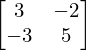

In [3]:
A=sy.Matrix([[3,-2],[-3,5]])
A

In [4]:
A.rank()

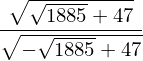

In [5]:
A.condition_number().simplify()

In [6]:
sy.N(_)

In [7]:
A.norm()

# confirm matrix $A$ property using numpy

In [15]:
A=np.array([[3,2],[-3,5]])

In [16]:
np.linalg.matrix_rank(A)

2

In [17]:
np.linalg.cond(A)

In [18]:
np.linalg.norm(A)

# solve linear equation $A\mathbf{x}=\mathbf{b}$ using sympy

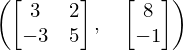

In [22]:
A=sy.Matrix([[3,2],[-3,5]])
b=sy.Matrix([8,-1])
A,b

In [25]:
x=A.inv()@b
x

In [28]:
x=A.inv()*b
x

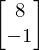

In [29]:
#check solve
b_=A*x
b_

In [31]:
#you can also express as follow using solve
x=A.solve(b)
x

# LU-decomposition

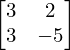

In [33]:
A=sy.Matrix([[3,2],[3,-5]])
A

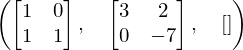

In [37]:
L,U,_=A.LUdecomposition()
L,U,_

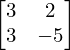

In [38]:
#check A=LU
L*U

In [40]:
%timeit x=A.solve(b)

100 loops, best of 3: 844 µs per loop


In [41]:
%timeit x=A.LUsolve(b)

1000 loops, best of 3: 293 µs per loop


# solve linear eq $A\mathbf{x}=\mathbf{b}$ using numpy and scipy

In [59]:
A=np.array([[3,2],[-3,5]])
b=np.array([[8,-1]]).T
x=sla.solve(A,b)
print(x)

[[ 2.]
 [ 1.]]


In [58]:
#check
A @ x-b

array([[ 0.],
       [ 0.]])

In [64]:
P,L,U=sla.lu(A)
print(P)
print(L)
print(U)

[[ 1.  0.]
 [ 0.  1.]]
[[ 1.  0.]
 [-1.  1.]]
[[ 3.  2.]
 [ 0.  7.]]


In [69]:
#check PLU=A 
P @ L @ U

array([[ 3.,  2.],
       [-3.,  5.]])

In [70]:
LU=sla.lu_factor(A)
LU

(array([[ 3.,  2.],
        [-1.,  7.]]), array([0, 1], dtype=int32))

In [72]:
x=sla.lu_solve(LU,b)
x

array([[ 2.],
       [ 1.]])